# Projeto 2 - Ciência dos Dados
- *Objetivo:* Prever uma variável principal em função de demais outras
variáveis que podem influenciar em seu comportamento.
- *Projeto feito por:* Beatriz Borges Zackiewicz, Cameron Swan, Felipe Fuchs, Renato Passarelli

### Bibliotecas e Diretório de Trabalho
---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
print('Esperamos trabalhar no diretório')
print(os.getcwd())



---
## Introdução
A época do mês de Janeiro é muito movimentada de fluxo de pessoas em todos os países, devido as festas de fim de ano e período de férias. Assim, o fluxo de voos em aeroportos é aumentado, uma vez que aviões são um dos principais meios de transportes nesse período. Nos Estados Unidos não poderia ser diferente. 
Nosso objetivo com esse estudo é de prever: um voo americano período de Janeiro será cancelado ou não? 

### O Dataset
Para esse estudo, utilizamos um dataset com as principais informações sobre voos nos aeroportos americanos de janeiro de 2019 e 2020.
- *Dataset File:* "Jan_2019_ontime.csv" e "Jan_2020_ontime.csv"
- *Dataset Author:* DIVYANSH AGRAWAL
- *Link para o Dataset:* https://www.kaggle.com/datasets/divyansh22/flight-delay-prediction

#### Informações do Dataset
- **`DAY_OF_MONTH:`** Dia do Mês de Janeiro do voo
- **`DAY_OF_WEEK:`** Dia da semana de Janeiro no voo
- **`OP_UNIQUE_CARRIER:`** Código único da companhia aérea (usado para a suas coligadas)
- **`OP_CARRIER_AIRLINE_ID:`** Número de identificação dado pela US DOT para identificar a linha aérea.
- **`OP_CARRIER:`** Código de identificação dado pela IATA e comumente usado para identificar a linha áerea. Como o mesmo código foi usado para aviões diferentes com o tempo, nem sempre é único.
- **`TAIL_NUM:`** Número de cauda
- **`OP_CARRIER_FL_NUM:`** Número do voo
- **`ORIGIN_AIRPORT_ID`** Identificação do aeroporto de origem do voo. O número de identificação é dado pela US DOT para identificar um aeroporto. 
- **`ORIGIN_AIRPORT_SEQ_ID:`** Aeroporto de origem, ID de sequencia. Número de identificação dado pela US DOT para identificar o aeroporto num determinado itinerario.
- **`ORIGIN:`** Aeroporto de origem
- **`DEST_AIRPORT_ID:`** Identificação do aeroporto de destino. Número de identificação dado pela US DOT para identificar o aeroporto.
- **`DEST_AIRPORT_SEQ_ID:`** Aeroporto de destino, ID de sequencia. Número de identificação dado pela US DOT para identificar o aeroporto num determinado itinerario.
- **`DEST:`** Aeroporto de destino
- **`DEP_TIME:`** Hórario de saída do voo
- **`DEP_DEL15:`** Se houve atraso de 15 minutos na saída: 0.0 = não / 1.0 = sim
- **`DEP_TIME_BLK:`** Bloco de horários de saída, intervalo de 1 hora
- **`ARR_TIME:`** Horário de chegada do voo
- **`ARR_DEL15:`** Se houve atraso de 15 minutos na chegada: 0.0 = não / 1.0 = sim
- **`CANCELLED:`** Se foi canelado: 0.0 = não / 1.0 = sim
- **`DIVERTED:`** Se foi desviado: 0.0 = não / 1.0 = sim
- **`DISTANCE:`** Distancia percorrida
---

## Nosso Target e Features

Prever: Se um voo americano em Janeiro vai ser cancelado ou não.

**`Target:`** Cancelado ou não --> coluna CANCELLED do dataset

**`Features:`** 
- Cia Aérea (OP_CARRIER)
- Origem (ORIGIN) 
- Destino (DEST)
- Atrasado (DEP_DEL15)
- Distância (DISTANCE)


---
## Modelo e Técnicas de Predição
No nosso estudo usamos: 
- Teste Qui-Quadrado de Pearson
- Regressão Logística

---
## Importando o DataSet
Importando e Juntando os Datasets dos dois anos em um só, filtrando apenas as features e o target de interesse para o estudo

In [ ]:
# FILTRANDO APENAS DADOS INTERESSANTES
dados_2019 = pd.read_csv('Jan_2019_ontime.csv', sep=',')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
Novos_dados_2019 = dados_2019.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2019['Ano'] = 2019
dados_2019.columns

In [ ]:
dados_2020 = pd.read_csv('Jan_2020_ontime.csv')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
Novos_dados_2020 = dados_2020.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2020['Ano'] = 2020
Novos_dados_2020.head(5)

In [ ]:
General_base  = pd.merge(Novos_dados_2020 , Novos_dados_2019, how = 'outer') # JUNTANDO AS DUAS BASES DE DADOS

General_base ['OP_CARRIER'] = General_base ['OP_CARRIER'].astype('category')
General_base ['ORIGIN'] = General_base ['ORIGIN'].astype('category')
General_base ['DEST'] = General_base ['DEST'].astype('category')
General_base ['CANCELLED'] = General_base ['CANCELLED'].astype('category')



In [ ]:
Comparador = pd.read_csv('Pasta1.csv')
print(Comparador)

In [ ]:
General_base ['OP_CARRIER'].cat.categories = [' Endeavor','American Airlines Cargo','Alaska Airlines','JetBlue','Delta Air Lines','Atlatic Southeast Airlines','Frontier Flight','Allegiant Air','Hawaiian Airlines','Envoy Air','Spirit Airlines','Comair Delta Connection','SkyWest Airlines','United Airlines Cargo','Southwest Airlines','Mesa Airlines','Midwest Airlines']


In [ ]:
Dados_gerais_00 = General_base 
Dados_gerais_00

### Fracionando o Dataset
Uma vez que o nosso Dataset final (unindo 2019 e 2020) possui mais de 1 milhão de voos, precisamos fracionar aleatóriamente ele para podermos rodar todas as iterações necessárias sem quebrar o programa. 

Fracionamos o DataSet em 10%

Além disso também precisamos eliminar os valores nulos do Dataset para não atrapalhar na análise. 

In [ ]:
Dados_gerais_00 = General_base 
Dados_gerais = Dados_gerais_00.sample(frac = 0.01)
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)


In [ ]:
Dados_gerais.dropna()

In [ ]:
# CHECANDO SE TEMOS VALORES NULOS
Cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 1.0]
Nao_cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 0.0]

print(Cancelados.isnull().sum())
print(len(Cancelados))
print(Nao_cancelados.isnull().sum())
print(len(Nao_cancelados))
# --> está certo, resultados esperados pois voos cancelados não atrasam e não cancelados podem ainda assim atrasar.


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
0.0,11673.0,807.406,596.327,31.0,369.00,645.0,1041.0,4983.0
1.0,240.0,626.950,425.201,77.0,302.75,513.5,867.0,2381.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
True,240.0,626.95,425.201,77.0,302.75,513.5,867.0,2381.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
False,11673.0,807.406,596.327,31.0,369.0,645.0,1041.0,4983.0


Text(0, 0.5, 'Frequência absoluta')

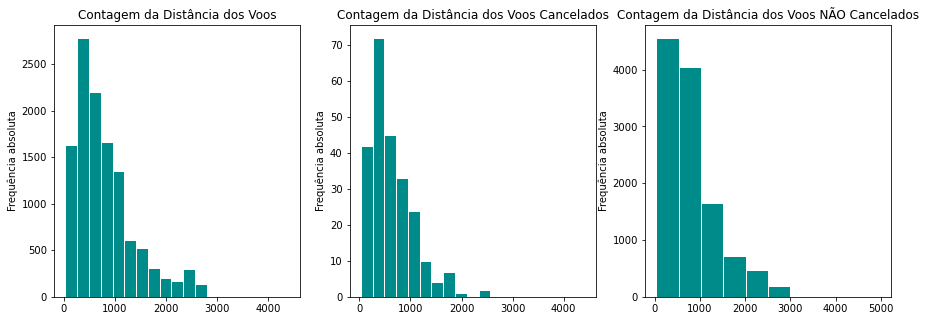

In [ ]:
# Nosso Target --> qualitativo (SIM/NÃO --> 1.0/0.0 --> CANCELADO/NÃO CANCELADO), por isso temos que 
# Estudar as relações com base em gráficos de QualitativasXQuantitativas e QualitativasXQualitativas

# CANCELADOS X DISTANCIA --> único caso qualixquant do nosso df
display(Dados_gerais.groupby(by= [Dados_gerais.CANCELLED]).DISTANCE.describe().round(3))
display(Cancelados.groupby(by= [Cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))
display(Nao_cancelados.groupby(by= [Nao_cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))

amplitude = Dados_gerais.DISTANCE.max()-Dados_gerais.DISTANCE.min()
amplitude_faixa= amplitude/ 10
faixa= np.arange(30, 5100.0, amplitude_faixa )

amplitude_cancelados = Cancelados.DISTANCE.max()-Cancelados.DISTANCE.min()
amplitude_faixa_cancelados = amplitude_cancelados / 10
faixa_canc = np.arange(30, 4480.0, amplitude_faixa_cancelados )

amplitude_nao_cancelados = Nao_cancelados.DISTANCE.max()-Nao_cancelados.DISTANCE.min()
amplitude_faixa_nao_cancelados = amplitude_nao_cancelados / 10
faixa_nao_canc = np.arange(30, 5100.0, amplitude_faixa_nao_cancelados )


plt.figure(figsize=(15, 5))
# GRÁFICO DA DISTÂNCIA POR VOO
plt.subplot(131)
plt.hist(Dados_gerais.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos')
plt.ylabel('Frequência absoluta')
# GRÁFICO CANCELADOS
plt.subplot(132)
plt.hist(Cancelados.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos Cancelados')
plt.ylabel('Frequência absoluta')
# GRÁFICO NÃO CANCELADOS
plt.subplot(133)
plt.hist(Nao_cancelados.DISTANCE, bins=faixa_nao_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos NÃO Cancelados')
plt.ylabel('Frequência absoluta')



CANCELLED,0.0,1.0
OP_CARRIER,,
Endeavor,99.1,0.9
American Airlines Cargo,98.0,2.0
Alaska Airlines,98.8,1.2
JetBlue,97.0,3.0
Delta Air Lines,99.8,0.2
Atlatic Southeast Airlines,95.7,4.3
Frontier Flight,99.5,0.5
Allegiant Air,100.0,0.0
Hawaiian Airlines,99.3,0.7


None


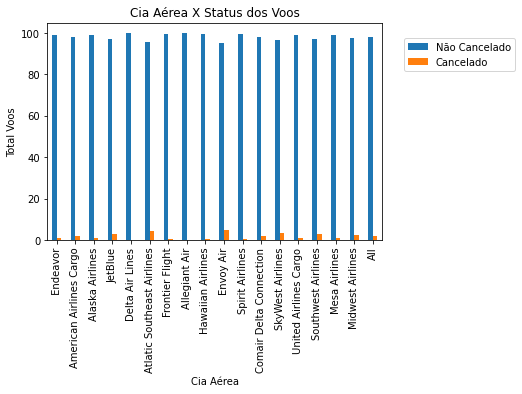

CANCELLED,0.0,1.0
DEST,,
ABE,100.0,0.0
ABI,100.0,0.0
ABQ,97.7,2.3
ABR,100.0,0.0
ABY,100.0,0.0
...,...,...
WRG,100.0,0.0
XNA,100.0,0.0
YAK,100.0,0.0


None


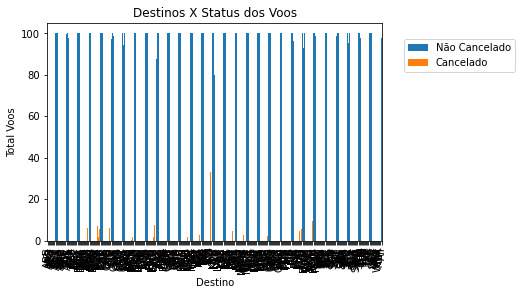

CANCELLED,0.0,1.0
ORIGIN,,
ABE,100.0,0.0
ABI,100.0,0.0
ABQ,100.0,0.0
ABR,100.0,0.0
ACT,100.0,0.0
...,...,...
WRG,100.0,0.0
XNA,95.5,4.5
XWA,100.0,0.0


None


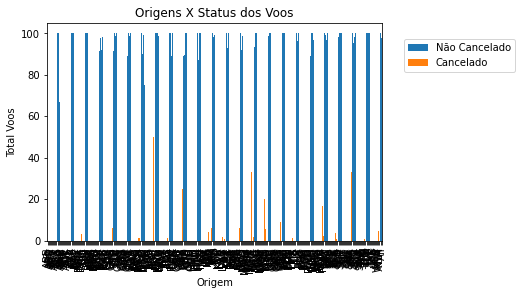

In [ ]:
# CRUZAMENTO DE QUALITATIVAS CM QUALITATIVAS
# FAZER TABELA DE FREQUENCIAS + GRÁFICOS DE BARRA
# PLOTAR UM AO LADO DO OUTRO SE POSSÍVEL
# Cia X Cancelados
cia_canc = pd.crosstab(Dados_gerais['OP_CARRIER'],Dados_gerais['CANCELLED'], normalize='index', margins=True).round(3)*100
#cia_canc__ordenado = cia_canc.sort_values(by=0.0)
print(display(cia_canc))
cia_canc.plot.bar()
plt.title('Cia Aérea X Status dos Voos')
plt.ylabel('Total Voos')
plt.xlabel('Cia Aérea')
plt.legend(loc='center')
plt.legend(['Não Cancelado', 'Cancelado'],bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Destino X Cancelados
dest_canc = pd.crosstab(Dados_gerais['DEST'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
#dest_canc_ordenado = dest_canc.sort_values(0.0)
print(display(dest_canc))
dest_canc.plot.bar()
plt.title('Destinos X Status dos Voos')
plt.ylabel('Total Voos')
plt.xlabel('Destino')
plt.legend(loc='center')
plt.legend(['Não Cancelado', 'Cancelado'],bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Origem X Cancelados
org_canc = pd.crosstab(Dados_gerais['ORIGIN'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
#org_canc_ordenado = org_canc.sort_values(0.0)
print(display(org_canc))
org_canc.plot.bar()
plt.title('Origens X Status dos Voos')
plt.ylabel('Total Voos')
plt.xlabel('Origem')
plt.legend(loc='center')
plt.legend(['Não Cancelado', 'Cancelado'],bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()



### Aplicando o Teste Qui-Quadrado de Pearson 
Apesar de plotados os gráficos de relação entre o Target e cada feature, não conseguimos observar alguma relação clara, uma vez que nas features de Origens e Destino, temos muitas classificações, fazendo com que a visualização do gráfico não fique tão clara. 

**`O Método:`** o Método do Teste Qui-Quadrado de Pearson é um teste que valida a dependência entre variáveis Categóricas, possuindo o objetivo final de verificar se duas variáveis são dependentes ou não entre sí. 
Ele consiste em estabeler uma Hipótese Nula (H0) = Não há dependência entre as variáveis, e para verificar essa hípose ele usa ou o valor-p ou o valor Qui-Quadrado.
Aqui escolhemos analisar pelo valor-p, uma vez que já estudamos ele no curso.

**`Aplicação:`**  
O valor-p é a probabilidade de ter uma diferença entre as variáveis maior do que a que se foi observada para a H0.
Estabelecemos um valor de signifiância (alfa) = 5%, ou seja, ele descreve a probabilidade de rejeitar H0 erroneamente quando for verdadeiro. Assim, se o valor-p for maior do que o alfa, devemos aceitar H0, concluindo pela independência entre as duas variáveis. 

In [ ]:
# TESTE QUI-QUADRADO DE PEARSON - teste de independência entre variáveis ​​categóricas
# adotando alfa de significancia = 5% (0.05)
from scipy.stats import chi2_contingency
alpha = 0.05

# Dependendia do status do voo X CIA AREA 
stat, pcia, dof, expected = chi2_contingency(cia_canc)
print("valor-p cia aérea é " + str(pcia))
if pcia <= alpha:
    print('Cancelamento e CIA aérea são DEPENDENTES')
else:
    print('Cancelamento e CIA aérea são INDEPENDENTES')

# Dependendia do status do voo X DESTINO
stat, pdest, dof, expected = chi2_contingency(dest_canc)
print("valor-p do Destino é "  + str(pdest))
if pdest <= alpha:
    print('Cancelamento e Destino são DEPENDENTES')
else:
    print('Cancelamento e Destino são INDEPENDENTES')

# Dependendia do status do voo X ORIGEM
stat, porg, dof, expected = chi2_contingency(org_canc)
print("valor-p da Origem é "  + str(porg))
if porg <= alpha:
    print('Cancelamento e Origem são DEPENDENTES')
else:
    print('Cancelamento Origem são INDEPENDENTES')

## Aplicando a Correlação nas variáveis quantitativas
A Feature Distância é a nossa única variável quantitativa dentro da nossa análise e por isso é a única sobre a qual podemos aplicar o índice de correlação.


In [ ]:
corr_canc_dist = Dados_gerais['CANCELLED'].corr(Dados_gerais['DISTANCE'])
print(f'A correlação entre o Cancelamento de Voos e Distância do voo = {corr_canc_dist}')

---
## Primeiras Conclusões

A partir dos coeficientes de relação e dependência entre o nosso Target e suas Features, podemos chegar a alguma conclusões importantes que antecedem a conclusão do nosso modelo. 

Apenas as features de Destino e Origem se mostraram dependentes do Target, enquanto a Companhia Aérea se mostrou Independente. 

Já a Distância por ter um coeficiente de correlação com o Cancelamento < 1, podemos concluir que ambas as variáveis são inversamente proporcionais, mas ainda sim se influenciam. 

Com isso, optamos por seguir apenas com as features de Distância, Origem e Destino para a construção do nosso modelo de predição, uma vez que foram apenas essas as variáveis que se mostraram relevantes para o nosso parâmetro de interesse.

---
# Montando os Modelos Preditivos
Como estamos trabalhando com variáveis qualitativas e a construção de modelos preditivos trabalha melhor com quantitativas, precisamos primeiro suavizar o nosso dataframe qualitativa para poder inseri-lo mais facilmente em modelos de predição. 

Para isso, aplicamos o método *get_dummies() da biblioteca Pandas*, que possibilita converter as variáveis categoricas em indicadores dummies. Os indicadores dummies, ou variáveis dummies, são um tipo de variável que denotam 1 para a presença da categoria e 0 para a sua falta. Por isso acabam sendo util para casos como o dessa predição, onde se quer ver a relação entre variáveis qualitativas que não tenham relações numéricas entre sí.  

E é isso que faremos no código abaixo:

In [ ]:
Dados_gerais_00 = Dados_gerais 
Dados_gerais = Dados_gerais_00.sample(frac = 0.1)
# Creating dataframe with
# rest of the 50% values
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Dados_gerais = Dados_gerais.dropna()
Dados_gerais.head(5)

In [ ]:
cat_vars = ['OP_CARRIER','ORIGIN', 'DEST']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(Dados_gerais[var],prefix = var)
    Dados_gerais = Dados_gerais.join(cat_list)
     
data_vars=Dados_gerais.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
data_final=Dados_gerais[to_keep]
data_final.columns.values

In [ ]:
data_final

In [ ]:
linhas = len(data_final)
col=726
b=0
while b < col:
    if b<col:
        nome = data_final.columns[b]
        a = 0
        sum = 0
        while a<linhas:
            sum+=data_final.iloc[a,b]
            a+=1
        
        print(nome)
        print(sum)
        if sum < 20 and nome!= "CANCELLED":
            data_final = data_final.drop(nome, axis=1)
            b+=-1
            col+=-1
        b+=1
        
data_sem_zero = data_final

In [ ]:
data_final=data_sem_zero
data_final

In [ ]:
linhas = len(data_final)
col=54
b=0
while b < col:
    if b<col:
        nome = data_final.columns[b]
        a = 0
        sum = 0
        while a<linhas:
            sum+=data_final.iloc[a,b]
            a+=1
        print(sum)
        if sum < 20 and nome!= "CANCELLED":
            data_final = data_final.drop(nome, axis=1)
            b+=-1
            col+=-1
        b+=1
        

---
## Aplicando o 1° Modelo: Regressão Logística
Primeiro vamos aplicar o métedo do modelo de Regressão Logística.


**`O que é Regressão Logística?`** Regressão logística é um dos tipos de Machine Learning classification algorithm e é usado para prever a probabilidade de uma variável categórica dependente. Nesse modelo a variável categórica é binária, ou seja, é correspondente a valores como 1 e 0. Por esse motivo, resolvemos adotar esse tipo de regressão para modelar o nosso problema, já que a nossa variável target é binária - Voo Cancelado (=1.0) // Voo Não Cancelado (0.0). 

Para isso iremos: nomear o Target e as Features, separar a nossa base de dados em dataframes de treino e de teste, utilizando a função direta para isso do sklearn. 
Sobre ela aplicar o modelo de Regressão Logística, também do sklearn, com a sua função direta. Assim teremos a previsão de acurácia do modelo, ao comparar os resultados obtidos pelo treino em cima do dataframe de teste. 

In [ ]:
# Separando o Target das Features
X = data_final.loc[:, data_final.columns != 'CANCELLED']
y = data_final.loc[:, data_final.columns == 'CANCELLED']

In [ ]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y= os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['CANCELLED'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['CANCELLED']==0]))
print("Number of subscription",len(os_data_y[os_data_y['CANCELLED']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==1])/len(os_data_X))

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, step = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
Name_list=[]
for i in range(len(rfe.support_)):
    teste = rfe.support_[i]
    nome = data_final.columns[i]
    if teste == True:
        Name_list.append(nome)
X=os_data_X[Name_list]
y=os_data_y['CANCELLED']

In [ ]:

logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Acurácia do Nosso Classificador de Regressão Logística sobre o df de teste: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:

confusion_matrix = confusion_matrix(y_test, y_pred)
certos=confusion_matrix[0][0]+confusion_matrix[1][1]
errados=confusion_matrix[0][1]+confusion_matrix[1][0]
print(confusion_matrix)

print(f'Temos {certos} predições certas')
print(f'Temos {errados} predições erradas')

In [ ]:
print('Relatório de Classificação do Nosso Modelo:')
print(classification_report(y_test, y_pred))

Gráfico de Curva ROC e AUC


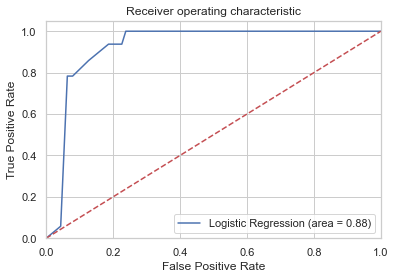

In [ ]:
print('Gráfico de Curva ROC e AUC')
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Resultados do Modelo de Regressão Logística
- **Acurácia final da Previsão do Modelo:** 92%
- **Gráfico de Curva ROC e AUC:** Esse tipo de gráfico plota a Curva ROC, a qual demonstra desempenho de um modelo de classificação seus limiares de classificação, representando os parâmetros das taxas de verdadeiro e falsos positivos sobre a predição. A área sob a curva ROC representa o AUC, a qual representa o desempenho em todos os limites de classificação possíveis, sendo assim equivalente a acurácia de previsão do modelo, no nosso caso, sendo assim AUC = 0.92.

### Conclusão
Nosso modelo está adequado, uma vez que ele possui uma alta taxa de acurácia, provando uma alta qualidade de previsão para ele. 

---
## Aplicando o 2° Modelo: Random Forest Classifier

In [ ]:
data_final ['CANCELLED'].cat.categories=['Não cancelado', 'Cancelado']
import seaborn as sns
import matplotlib.pyplot as plt

X = data_final.loc[:, data_final.columns != 'CANCELLED']
y = data_final.loc[:, data_final.columns == 'CANCELLED']

from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.7, 
                                                    random_state=SEED)

                                                    from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, 
                             max_depth=2,
                             random_state=SEED)

# Fit RandomForestClassifier
rfc.fit(X_train, y_train)

# Predict the test set labels
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)


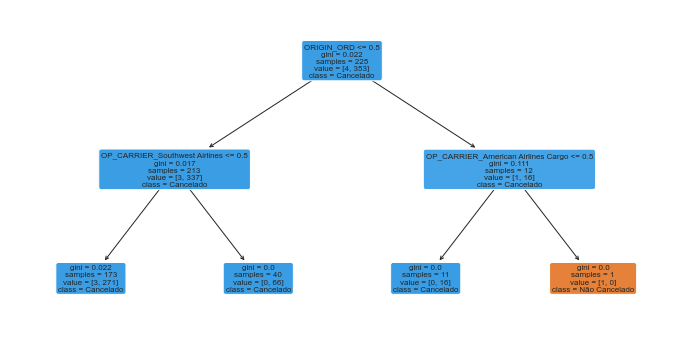

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)


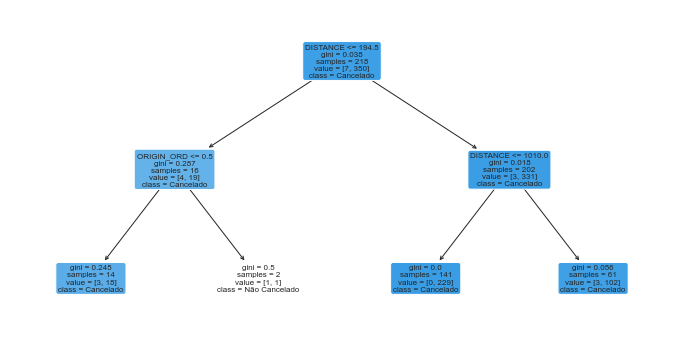

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


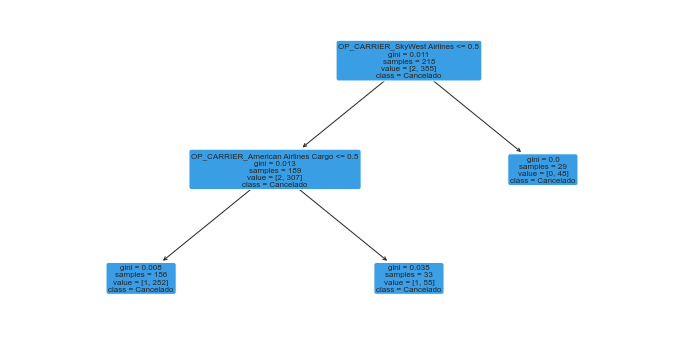

In [36]:
features = X.columns.values # The name of each column
classes = ['Não Cancelado', 'Cancelado'] # The name of each class


for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

               precision    recall  f1-score   support

    Cancelado       0.00      0.00      0.00        12
Não cancelado       0.99      1.00      0.99       822

     accuracy                           0.99       834
    macro avg       0.49      0.50      0.50       834
 weighted avg       0.97      0.99      0.98       834



C:\Users\camer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\camer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\camer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


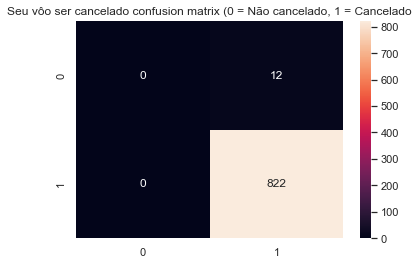

In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Seu vôo ser cancelado confusion matrix (0 = Não cancelado, 1 = Cancelado')

print(classification_report(y_test,y_pred))



---
## Aplicando o 3° Modelo: Decision Tree Classifier


In [ ]:
linhas = len(data_final)
colunas = len(data_final.columns)
col= colunas
tamanho = []
b=0
while b < col:
    if b<col:
        nome = data_final.columns[b]
        if nome != 'CANCELLED':
            tamanho.append(nome)
    b+=1

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X = data_final.loc[:, data_final.columns != 'CANCELLED']
y = data_final.loc[:, data_final.columns == 'CANCELLED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

---
# Referências 

- https://acervolima.com/python-teste-qui-quadrado-de-pearson/
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
- https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
- https://www.datacamp.com/tutorial/decision-tree-classification-python
- https://www.statisticshowto.com/dummy-variables/